In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import iplot, init_notebook_mode
import plotly.tools as tls
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [3]:
BASEPATH = "samples"

In [4]:
def listdir(basepath):
    return sorted([os.path.join(basepath, folder) for folder in os.listdir(basepath)])

In [5]:
samples_paths = listdir(BASEPATH)

In [9]:
sample_readings_paths

['samples\\3634\\1561815793.81574.csv',
 'samples\\3634\\1561815801.4702518.csv',
 'samples\\3634\\1561815806.8110495.csv',
 'samples\\3634\\1561815809.5374606.csv',
 'samples\\3634\\1561815812.1585147.csv',
 'samples\\3634\\1561815815.8900566.csv',
 'samples\\3634\\1561815818.814221.csv',
 'samples\\3634\\1561815821.13692.csv',
 'samples\\3634\\1561815824.0634167.csv',
 'samples\\3634\\1561815826.5894377.csv']

In [6]:
sample_readings_paths = listdir(samples_paths[1])

In [17]:
def subplot25(sample_readings_paths):
    fig, axes = plt.subplots(2, 5, sharex=True, sharey=True)
    for ix, sample_path in enumerate(sample_readings_paths):
        df = pd.read_csv(sample_path)
        axes[ix//5,ix%5].plot(df['wavelengths'], df['intensities'])
    fig.suptitle(sample_path)
    image_save_path = os.path.dirname(sample_path)
    plt.savefig(os.path.join(image_save_path, 'sample.png'))

C:\Users\ugurg\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



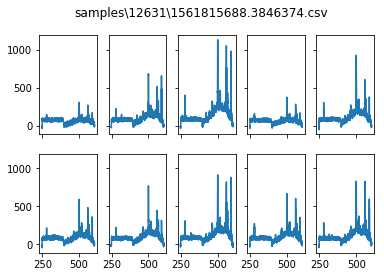

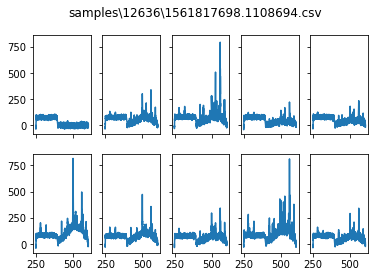

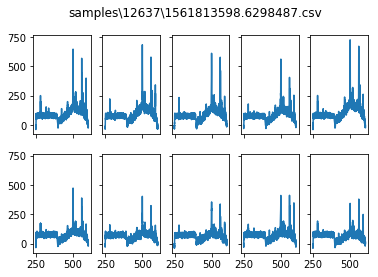

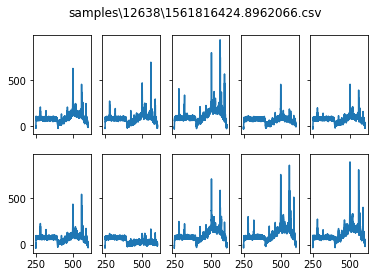

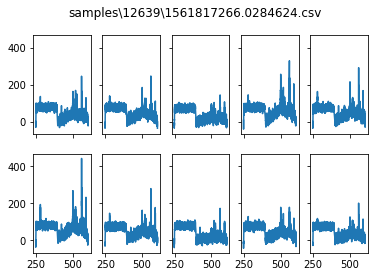

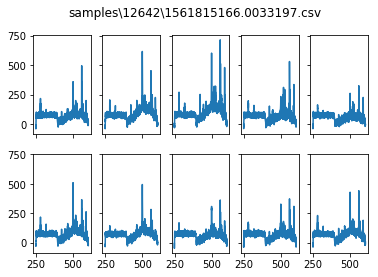

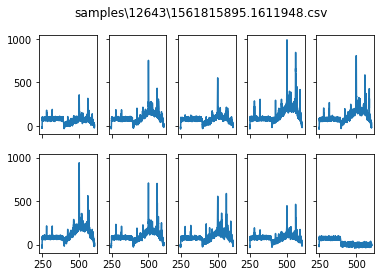

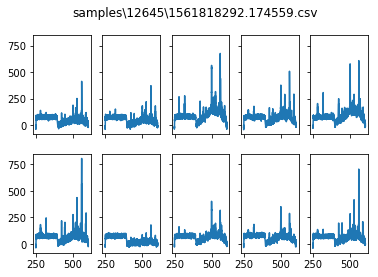

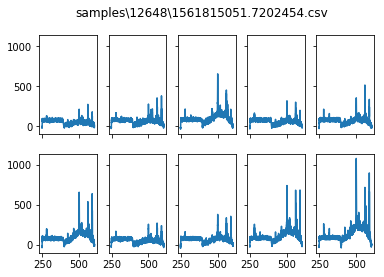

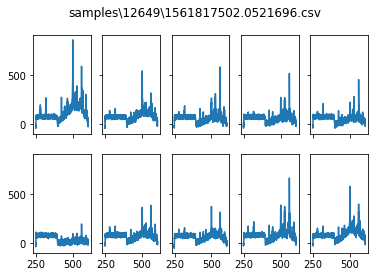

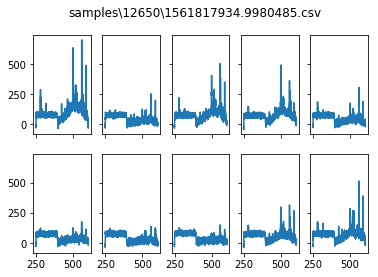

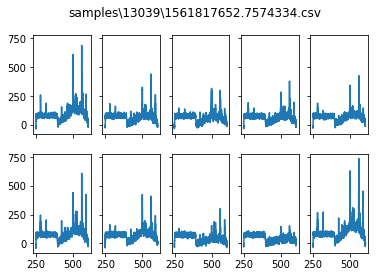

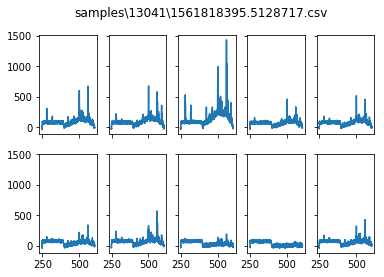

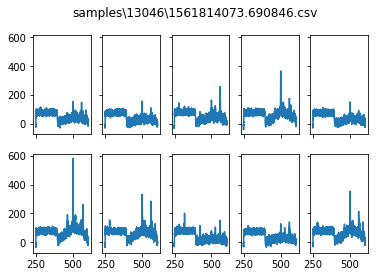

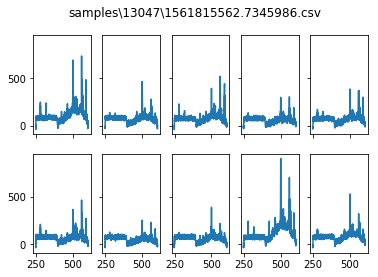

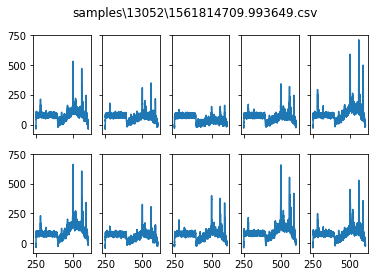

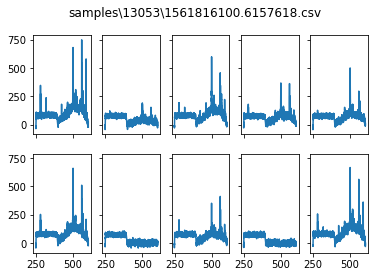

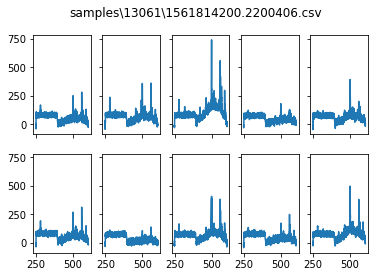

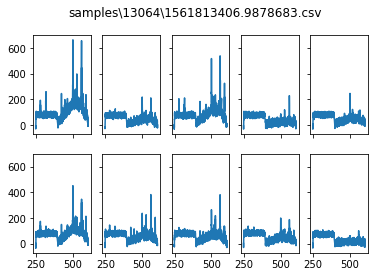

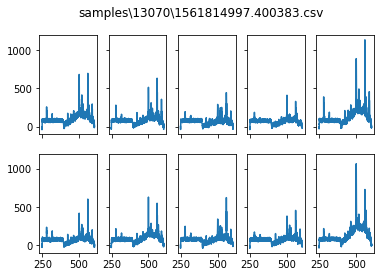

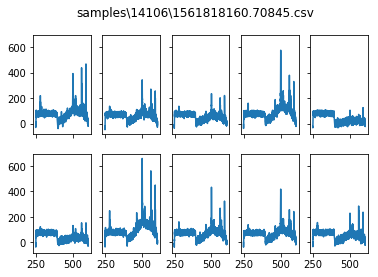

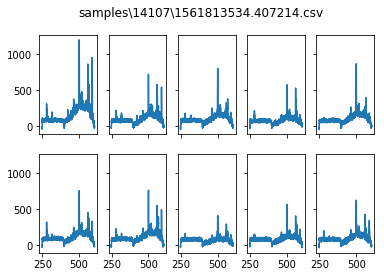

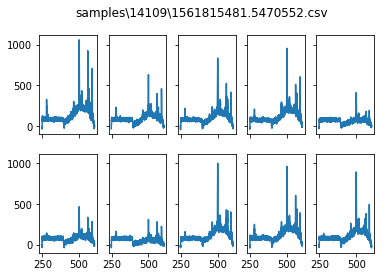

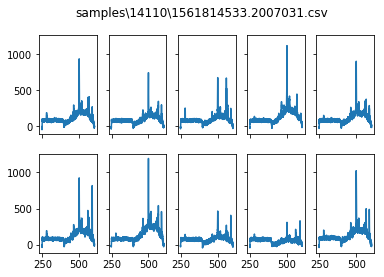

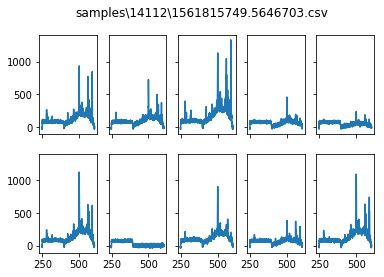

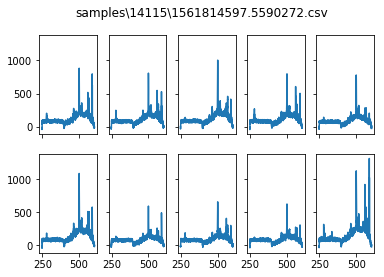

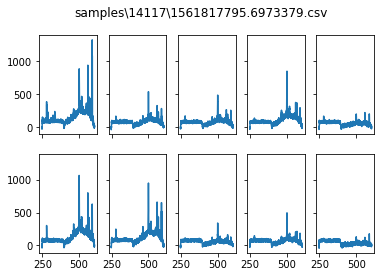

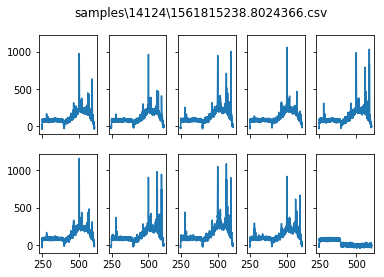

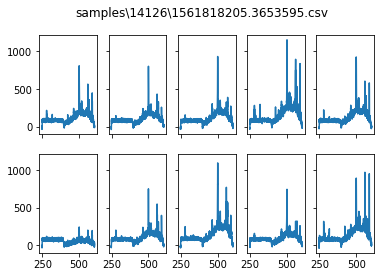

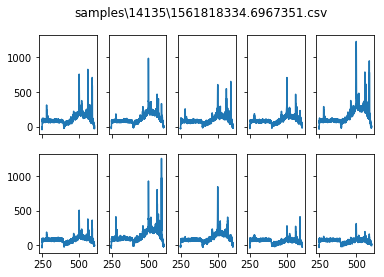

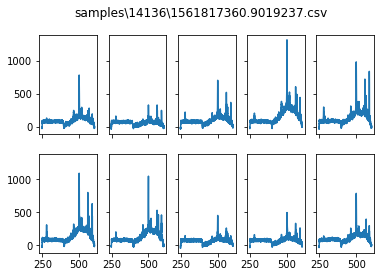

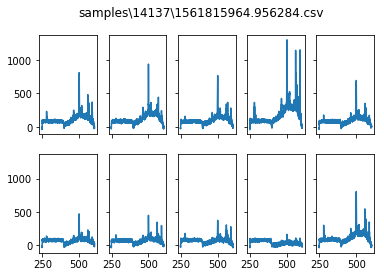

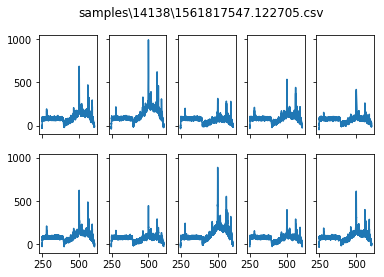

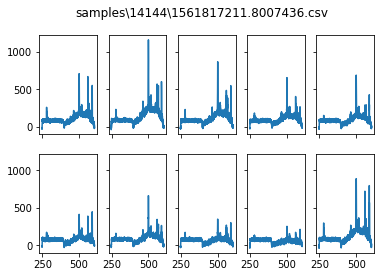

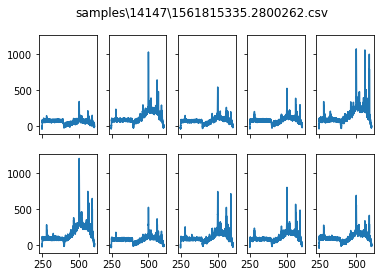

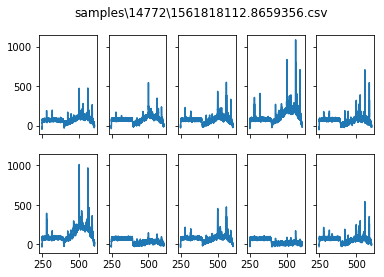

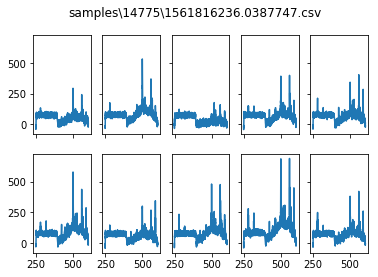

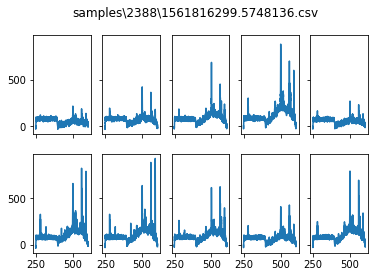

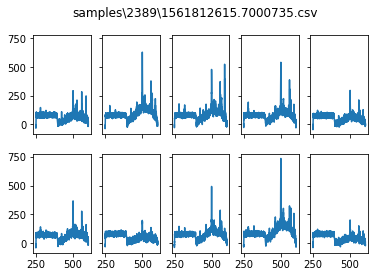

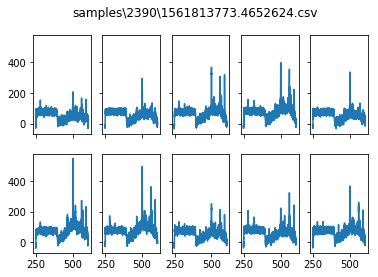

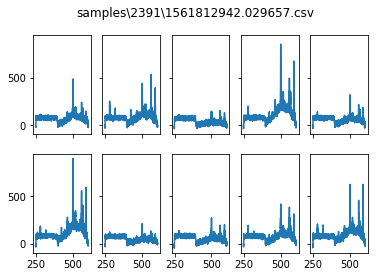

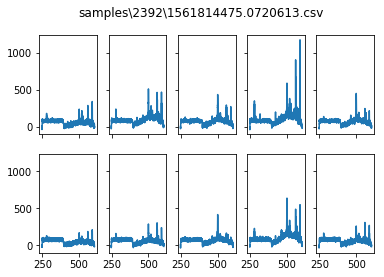

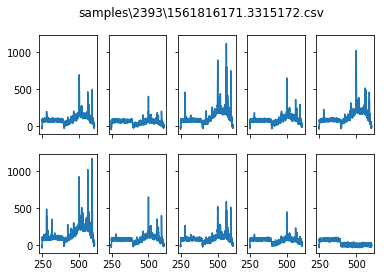

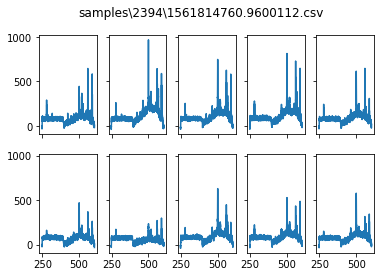

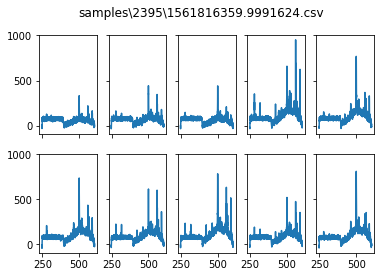

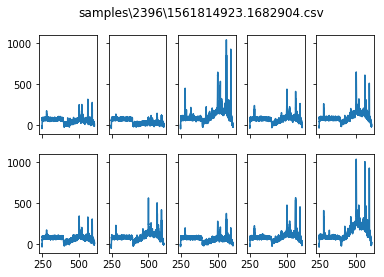

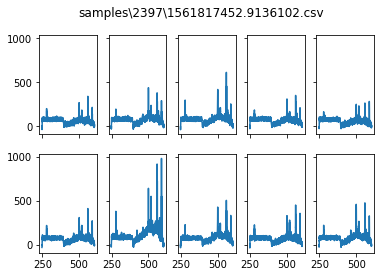

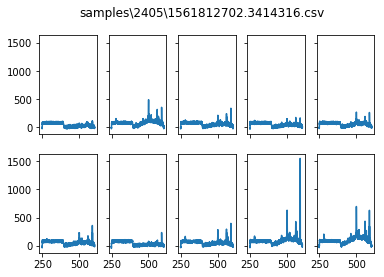

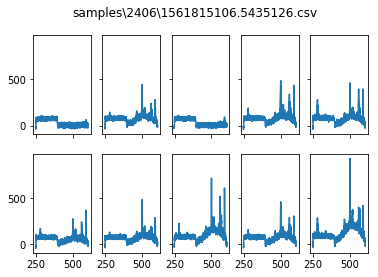

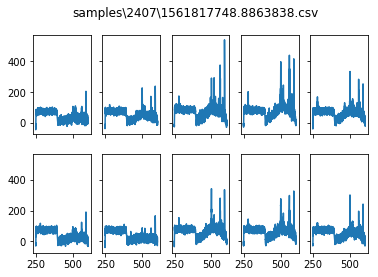

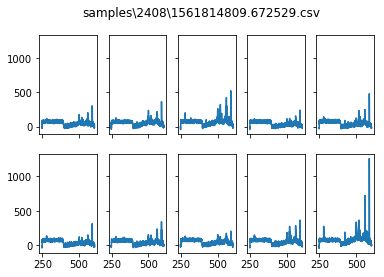

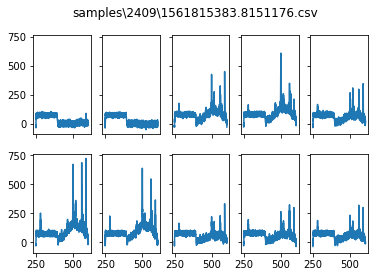

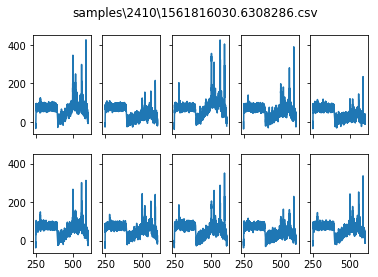

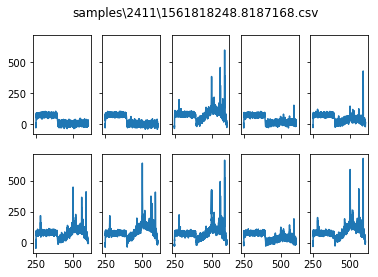

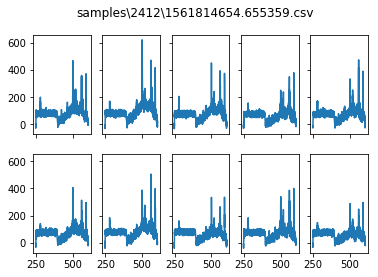

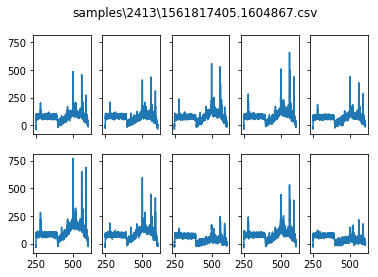

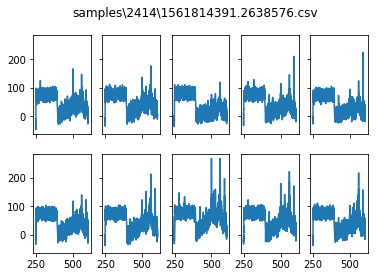

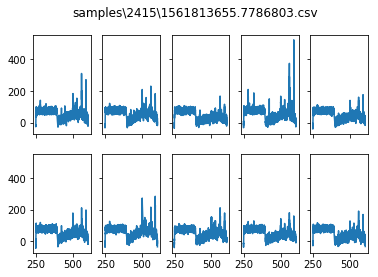

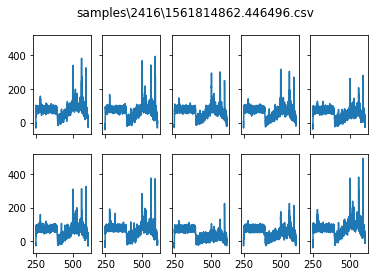

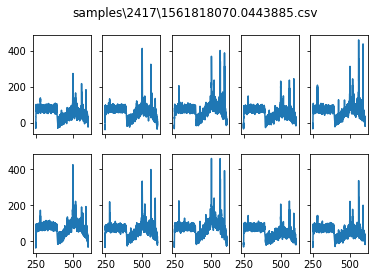

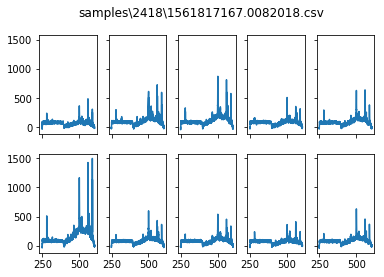

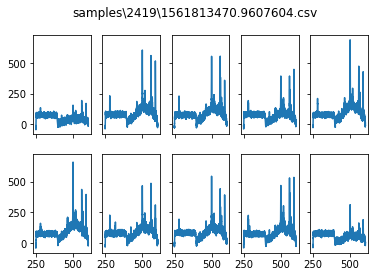

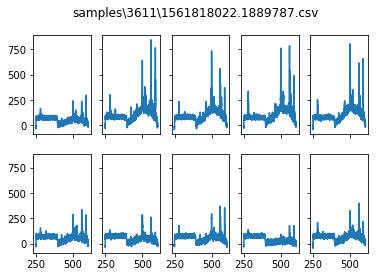

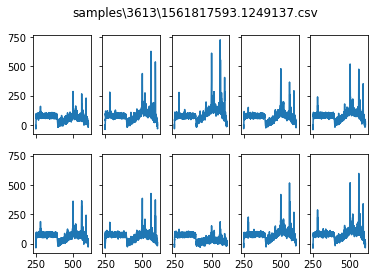

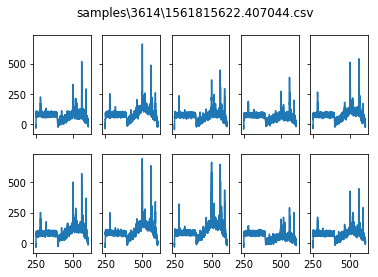

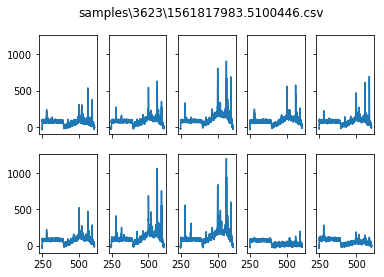

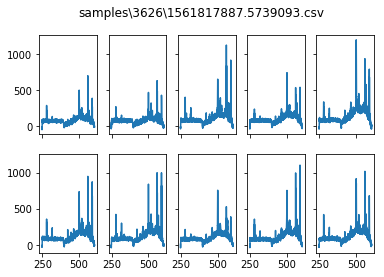

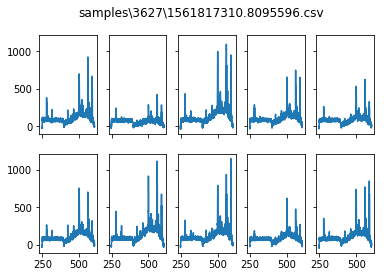

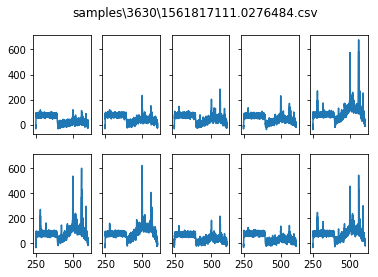

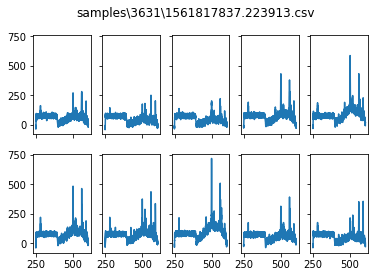

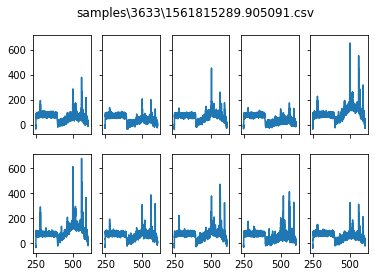

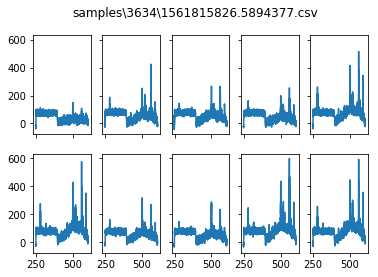

In [18]:
for sample_path in samples_paths:
    sample_readings_paths = listdir(sample_path)
    subplot25(sample_readings_paths)

In [20]:
from functools import partial
from scipy import signal

class Sample:
    def __init__(self, path):
        self.raw_readings = [pd.read_csv(os.path.join(path, reading_name)) 
                             for reading_name in os.listdir(path) if os.path.splitext(reading_name)[-1] == '.csv']
        
        # average samples
        self.reading = self.dataframes_average(self.raw_readings)
        # round sample
        self.reading = self.reading.round(3)
        self.plot = partial(self.subplot, [self.reading], 1, 1)
        
        self.reading = self.find_peaks(self.reading)
        self.path = path
        self.labno = int(path.split('\\')[-1])
    
    @staticmethod
    def find_peaks(reading, inplace=False):
        if not inplace:
            reading = reading.copy()
        
        peak_interval = 1.
        wavelengths = reading['wavelengths'].values
        intensities = reading['intensities'].values
        
        wavelengths_range = wavelengths.max() - wavelengths.min()
        sampling_interval = wavelengths_range / wavelengths.shape[0]

        peak_ixs = signal.argrelmax(intensities,
                                    order=int(peak_interval / sampling_interval))[0]
        
        reading['is_peak'] = False
        reading.loc[peak_ixs, 'is_peak'] = True
        return reading
    
    @staticmethod
    def get_reading_cond(intensities_above=200, is_peak=True):
        return s.reading.loc[(s.reading['intensities'] > intensities_above) & (s.reading['is_peak']==is_peak)]
        
        
    @staticmethod
    def subplot(readings, row, col):
        fig, axes = plt.subplots(row, col, sharex=True, sharey=True, squeeze=False)
        for ix, reading in enumerate(readings):
            axes[ix//col,ix%col if col!=1 else 0].plot(reading['wavelengths'], reading['intensities'])

    @staticmethod
    def plotly_plot(s):
        peak_df = s.reading.loc[s.reading['is_peak'] == True, :]
        trace_reading = go.Scatter(x=s.reading['wavelengths'], y=s.reading['intensities'], name='reading')
        trace_peak = go.Scatter(x=peak_df['wavelengths'], y=peak_df['intensities'], mode='markers', name='peaks')
        layout = go.Layout(
            xaxis=dict(
                range=[200, 700]
            ),
            yaxis=dict(
                range=[0, 2000]
            )
        )
        fig = go.Figure(data=[trace_reading, trace_peak], layout=layout)
        return fig
    
    
#     @staticmethod
#     def dataframes_round(dataframes):
#         r_dataframes = []
#         for df in dataframes:
#             r_dataframes += [df.round(2)]
#         return r_dataframes
    
    @staticmethod
    def dataframes_average(dataframes):
        avg_df = dataframes[0].copy()
        for df in dataframes[1:]:
            avg_df += df
        return avg_df / dataframes.__len__()
    
    def get_peak(self, nm):
        return self.reading.loc[self.reading['wavelengths'] == nm, 'intensities'].values[0]
        


In [53]:
# choose nm
s.reading.loc[(s.reading['intensities'] > 200) & (s.reading['is_peak']==True)]
N_nm = 589.024 # above equation's last entry

# N i√ßin 500nm ekle.

# Azotu tekrarlananlar

In [27]:
df = pd.read_excel("Azotu tekrarlananlar.xlsx")

In [28]:
# get only valid samples
df = df.loc[df['Valid']==1, :] 

In [29]:
# get adana only
df_adana = df.loc[df['Loc']=='Adana', :]

In [30]:
df_adana = df_adana.dropna(axis=1).sort_values(by=['Lab no']).reset_index(drop=True)


In [31]:
df_adana

Lab no    Loc SampleNo  Valid  %Azot
0    12636  Adana       41      1   0.84
1    12637  Adana       42      1   0.22
2    12638  Adana       35      1   0.17
3    12639  Adana       49      1   0.39
4    12642  Adana       28      1   0.22
5    12643  Adana       37      1   0.84
6    12645  Adana       30      1   0.22
7    12648  Adana       43      1   0.45
8    12649  Adana       26      1   0.34
9    13039  Adana       32      1   0.17
10   13041  Adana       33      1   0.28
11   13046  Adana       40      1   0.22
12   13047  Adana       46      1   0.11
13   13052  Adana       27      1   0.22
14   13053  Adana       29      1   0.16
15   13061  Adana       47      1   0.22
16   13064  Adana       31      1   0.22
17   13070  Adana       45      1   0.06

In [43]:
N_nms = [500.540,
        [589.024, 589.116],
        279.482,
        334.762,
        421.624,
        [443.506, 443.613]]

In [42]:
s = Sample(path=samples_paths[0])
s.reading.loc[(s.reading['is_peak'] == True) & (s.reading['wavelengths'] > 490)]

wavelengths  intensities  is_peak
2922      490.715      149.954     True
2958      494.410      163.371     True
3018      500.540      705.378     True
3057      504.505      249.409     True
3110      509.869      159.540     True
3130      511.886      157.292     True
3185      517.411      287.641     True
3282      527.080      184.990     True
3315      530.347      151.767     True
3341      532.912      168.109     True
3364      535.176      161.009     True
3383      537.042      148.268     True
3399      538.610      151.105     True
3420      540.664      144.199     True
3441      542.713      145.244     True
3472      545.729      155.617     True
3496      548.057      179.453     True
3516      549.992      199.470     True
3530      551.344      189.605     True
3553      553.560      191.402     True
3612      559.218      590.152     True
3627      560.650      431.023     True
3656      563.412      130.324     True
3704      567.962      297.107     True
3731      570.509      157.014     True
3774      574.549       99.801     True
3794      576.421      140.112     True
3815      578.381       91.081     True
3860      582.565       88.471     True
3895      585.801       92.897     True
3912      587.368       80.426     True
3930      589.024      486.240     True
3953      591.133       79.982     True
3982      593.784      104.439     True
4055      600.411       27.173     True

In [47]:
samples = list()
for path in samples_paths:
    samples += [Sample(path=path)]

def create_nm_columns(df):
    for i, N_nm in enumerate(N_nms):
        peak_str = ''
        if isinstance(N_nm, (list,)):
            peak_str = '-'.join([f'N{i}@{eachnm}' for eachnm in N_nm])
        else:
            peak_str += f'N{i}@{N_nm}'
        
        df[peak_str] = np.nan
    return df

def insert_peak_values(df):
    for sample in samples:
        for i, N_nm in enumerate(N_nms):
            peak_str = ''
            peak_value = 0.
            if isinstance(N_nm, (list,)):
                peak_str = '-'.join([f'N{i}@{eachnm}' for eachnm in N_nm])
                peak_value = sum([sample.get_peak(eachnm) for eachnm in N_nm])
            else:
                peak_str += f'N{i}@{N_nm}'
#                 print(N_nm, sample.labno)
                peak_value = sample.get_peak(N_nm)

            df.loc[df['Lab no']==sample.labno, peak_str] = peak_value
    return df
        
df_adana = create_nm_columns(df_adana.copy())
df_adana = insert_peak_values(df_adana.copy())
df_adana   

Lab no    Loc SampleNo  Valid  %Azot  N0@589.024-N0@589.116  N1@279.482  \
0    12636  Adana       41      1   0.84                265.760     137.788   
1    12637  Adana       42      1   0.22                407.464     186.979   
2    12638  Adana       35      1   0.17                450.602     205.041   
3    12639  Adana       49      1   0.39                246.286     124.388   
4    12642  Adana       28      1   0.22                416.137     159.776   
5    12643  Adana       37      1   0.84                346.302     165.129   
6    12645  Adana       30      1   0.22                267.190     136.206   
7    12648  Adana       43      1   0.45                657.258     179.545   
8    12649  Adana       26      1   0.34                264.773     128.499   
9    13039  Adana       32      1   0.17                389.858     155.150   
10   13041  Adana       33      1   0.28                296.660     174.538   
11   13046  Adana       40      1   0.22                141.843     107.564   
12   13047  Adana       46      1   0.11                418.091     158.089   
13   13052  Adana       27      1   0.22                459.490     166.811   
14   13053  Adana       29      1   0.16                286.421     155.394   
15   13061  Adana       47      1   0.22                226.917     134.330   
16   13064  Adana       31      1   0.22                251.975     119.149   
17   13070  Adana       45      1   0.06                387.292     200.787   

    N2@334.762  N3@421.624  N4@443.506-N4@443.613  N0@500.54  \
0       79.926      27.372                172.213    301.507   
1       90.965      40.937                159.081    505.421   
2       88.110      43.352                179.935    554.804   
3       77.071      13.921                 85.405    154.259   
4       82.484      31.039                169.484    396.895   
5       85.761      50.893                200.965    601.435   
6       78.864      22.262                185.258    308.965   
7       91.903      37.550                157.949    482.438   
8       81.075      26.458                183.079    376.207   
9       80.127      26.045                151.334    347.454   
10      81.920      36.058                155.354    419.423   
11      74.817      17.758                 84.307    233.037   
12      81.000      34.468                146.694    455.168   
13      82.588      33.051                135.852    431.651   
14      83.254      25.274                109.383    393.234   
15      81.221      31.775                 99.787    319.215   
16      82.780      20.663                133.861    268.093   
17      85.743      46.654                199.424    550.083   

    N1@589.024-N1@589.116  N2@279.482  N3@334.762  N4@421.624  \
0                 265.760     137.788      79.926      27.372   
1                 407.464     186.979      90.965      40.937   
2                 450.602     205.041      88.110      43.352   
3                 246.286     124.388      77.071      13.921   
4                 416.137     159.776      82.484      31.039   
5                 346.302     165.129      85.761      50.893   
6                 267.190     136.206      78.864      22.262   
7                 657.258     179.545      91.903      37.550   
8                 264.773     128.499      81.075      26.458   
9                 389.858     155.150      80.127      26.045   
10                296.660     174.538      81.920      36.058   
11                141.843     107.564      74.817      17.758   
12                418.091     158.089      81.000      34.468   
13                459.490     166.811      82.588      33.051   
14                286.421     155.394      83.254      25.274   
15                226.917     134.330      81.221      31.775   
16                251.975     119.149      82.780      20.663   
17                387.292     200.787      85.743      46.654   

    N5@443.506-N5@443.613  
0                 172

In [48]:
plot_df = df_adana.sort_values(by=['%Azot'])
plot_df

Lab no    Loc SampleNo  Valid  %Azot  N0@589.024-N0@589.116  N1@279.482  \
17   13070  Adana       45      1   0.06                387.292     200.787   
12   13047  Adana       46      1   0.11                418.091     158.089   
14   13053  Adana       29      1   0.16                286.421     155.394   
2    12638  Adana       35      1   0.17                450.602     205.041   
9    13039  Adana       32      1   0.17                389.858     155.150   
1    12637  Adana       42      1   0.22                407.464     186.979   
15   13061  Adana       47      1   0.22                226.917     134.330   
4    12642  Adana       28      1   0.22                416.137     159.776   
6    12645  Adana       30      1   0.22                267.190     136.206   
13   13052  Adana       27      1   0.22                459.490     166.811   
16   13064  Adana       31      1   0.22                251.975     119.149   
11   13046  Adana       40      1   0.22                141.843     107.564   
10   13041  Adana       33      1   0.28                296.660     174.538   
8    12649  Adana       26      1   0.34                264.773     128.499   
3    12639  Adana       49      1   0.39                246.286     124.388   
7    12648  Adana       43      1   0.45                657.258     179.545   
5    12643  Adana       37      1   0.84                346.302     165.129   
0    12636  Adana       41      1   0.84                265.760     137.788   

    N2@334.762  N3@421.624  N4@443.506-N4@443.613  N0@500.54  \
17      85.743      46.654                199.424    550.083   
12      81.000      34.468                146.694    455.168   
14      83.254      25.274                109.383    393.234   
2       88.110      43.352                179.935    554.804   
9       80.127      26.045                151.334    347.454   
1       90.965      40.937                159.081    505.421   
15      81.221      31.775                 99.787    319.215   
4       82.484      31.039                169.484    396.895   
6       78.864      22.262                185.258    308.965   
13      82.588      33.051                135.852    431.651   
16      82.780      20.663                133.861    268.093   
11      74.817      17.758                 84.307    233.037   
10      81.920      36.058                155.354    419.423   
8       81.075      26.458                183.079    376.207   
3       77.071      13.921                 85.405    154.259   
7       91.903      37.550                157.949    482.438   
5       85.761      50.893                200.965    601.435   
0       79.926      27.372                172.213    301.507   

    N1@589.024-N1@589.116  N2@279.482  N3@334.762  N4@421.624  \
17                387.292     200.787      85.743      46.654   
12                418.091     158.089      81.000      34.468   
14                286.421     155.394      83.254      25.274   
2                 450.602     205.041      88.110      43.352   
9                 389.858     155.150      80.127      26.045   
1                 407.464     186.979      90.965      40.937   
15                226.917     134.330      81.221      31.775   
4                 416.137     159.776      82.484      31.039   
6                 267.190     136.206      78.864      22.262   
13                459.490     166.811      82.588      33.051   
16                251.975     119.149      82.780      20.663   
11                141.843     107.564      74.817      17.758   
10                296.660     174.538      81.920      36.058   
8                 264.773     128.499      81.075      26.458   
3                 246.286     124.388      77.071      13.921   
7                 657.258     179.545      91.903      37.550   
5                 346.302     165.129      85.761      50.893   
0                 265.760     137.788      79.926      27.372   

    N5@443.506-N5@443.613  
17                199

In [46]:
column_names = plot_df.columns.values[5:]
data = list()
for column_name in column_names:
    trace = go.Scatter(x=plot_df['%Azot'], y=plot_df[column_name], name=column_name, mode='lines+markers')
    data += [trace]
layout = go.Layout(xaxis=())
fig = go.Figure(data=data)
iplot(fig, filename='plot')
